# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the validation of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.28590772863500136
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.2109236543312285
              precision    recall  f1-score   support

           1       0.33      0.85      0.48       252
           2       0.47      0.83      0.60       252
           3       0.44      0.43      0.43       252
           4       0.26      0.25      0.26       252
           5       0.27      0.21      0.24       252
           6       0.22      0.30      0.26       252
           7       0.20      0.31      0.24       252
           8       0.34      0.28      0.31       252
           9       0.22      0.19      0.20       252
          10       0.23      0.19      0.21       252
          11       0.24      0.18      0.21       252
          12       0.18      0.17      0.17       252
          13       0.28      0.24      0.26       252
          1

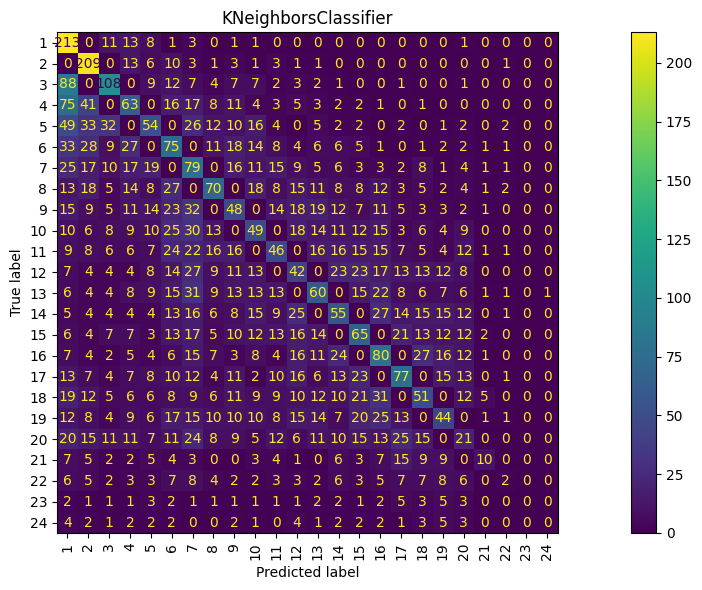

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.2801846911506002
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.206751119720186
              precision    recall  f1-score   support

           1       0.38      0.83      0.52       252
           2       0.56      0.77      0.64       252
           3       0.33      0.35      0.34       252
           4       0.35      0.31      0.33       252
           5       0.26      0.28      0.27       252
           6       0.22      0.34      0.26       252
           7       0.23      0.30      0.26       252
           8       0.31      0.25      0.28       252
           9       0.21      0.18      0.19       252
          10       0.20      0.21      0.20       252
          11       0.24      0.20      0.22       252
          12       0.19      0.21      0.20       252
          13       0.21      0.22      0.22       252
          14 

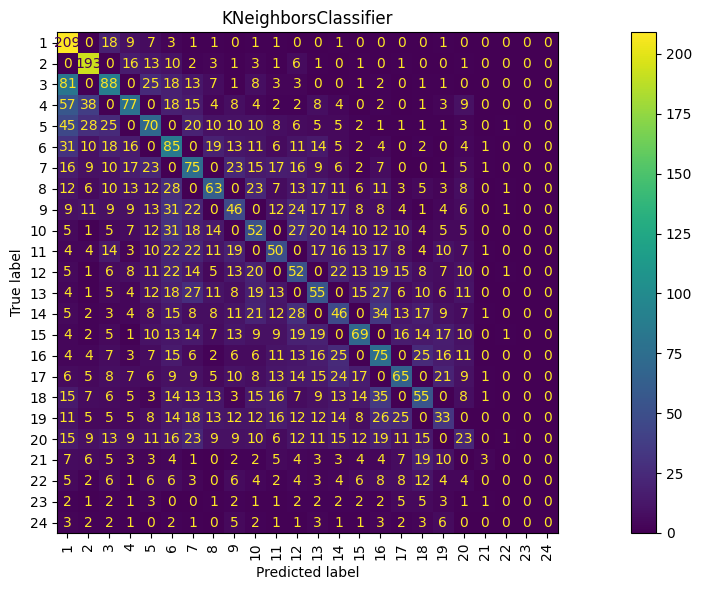

In [4]:
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.33856947976266155
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5920759566509277
              precision    recall  f1-score   support

           1       0.66      0.81      0.73       252
           2       0.52      0.73      0.61       252
           3       0.51      0.64      0.57       252
           4       0.36      0.47      0.40       252
           5       0.42      0.40      0.41       252
           6       0.32      0.40      0.36       252
           7       0.23      0.35      0.28       252
           8       0.30      0.31      0.31       252
           9       0.22      0.23      0.23       252
          10       0.39      0.25      0.30       252
          11       0.19      0.31      0.24       252
          12       0.21      0.37      0.27       252
          13       0.39      0.21      0.27       252
          1

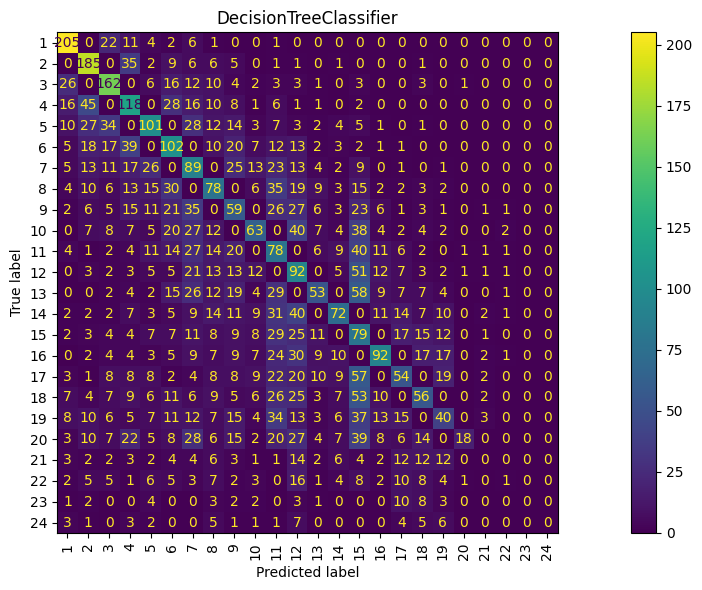

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitLng",
        "circuitAlt",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3437049545572272
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.567456531242028
              precision    recall  f1-score   support

           1       0.65      0.81      0.72       252
           2       0.59      0.72      0.65       252
           3       0.51      0.63      0.57       252
           4       0.37      0.50      0.42       252
           5       0.38      0.43      0.40       252
           6       0.32      0.43      0.37       252
           7       0.25      0.37      0.29       252
           8       0.33      0.30      0.31       252
           9       0.23      0.22      0.23       252
          10       0.40      0.25      0.31       252
          11       0.19      0.32      0.24       252
          12       0.21      0.38      0.27       252
          13       0.46      0.23      0.30       252
          14 

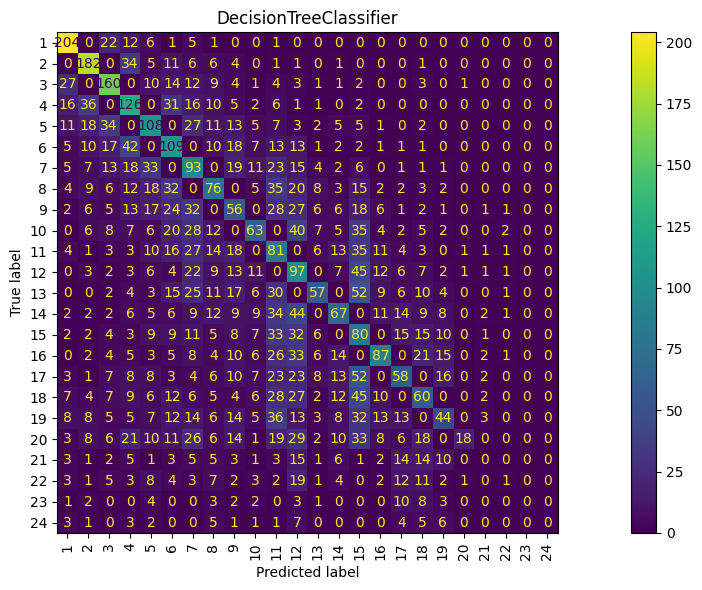

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34650128911492545
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5508009956436615
              precision    recall  f1-score   support

           1       0.51      0.87      0.64       252
           2       0.57      0.84      0.68       252
           3       0.48      0.58      0.53       252
           4       0.40      0.46      0.43       252
           5       0.35      0.40      0.38       252
           6       0.35      0.46      0.40       252
           7       0.20      0.35      0.25       252
           8       0.45      0.39      0.42       252
           9       0.23      0.28      0.25       252
          10       0.24      0.19      0.21       252
          11       0.39      0.25      0.31       252
          12       0.25      0.30      0.27       252
          13       0.30      0.26      0.28    

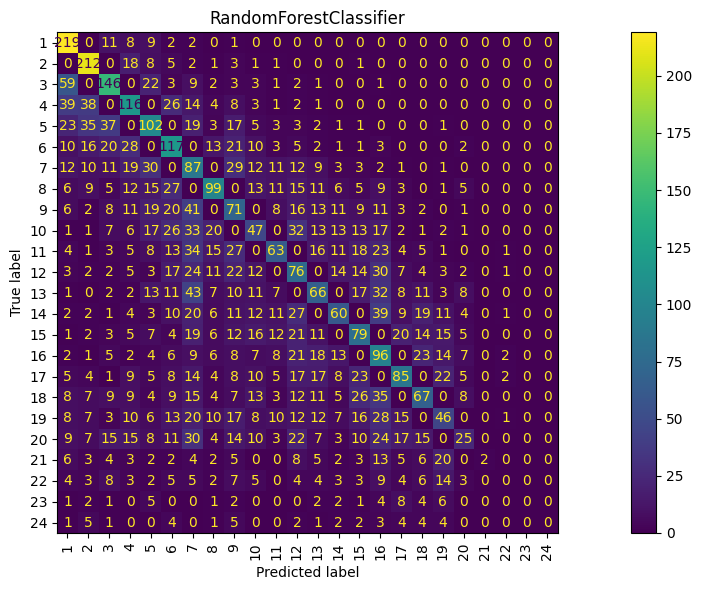

In [7]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorNationality",
        "raceRound",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35297445609945605
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5787806558953936
              precision    recall  f1-score   support

           1       0.48      0.88      0.62       252
           2       0.61      0.82      0.70       252
           3       0.45      0.52      0.48       252
           4       0.39      0.46      0.42       252
           5       0.36      0.41      0.38       252
           6       0.29      0.44      0.35       252
           7       0.22      0.38      0.28       252
           8       0.48      0.37      0.42       252
           9       0.22      0.24      0.23       252
          10       0.27      0.23      0.25       252
          11       0.33      0.30      0.32       252
          12       0.27      0.31      0.29       252
          13       0.34      0.27      0.30    

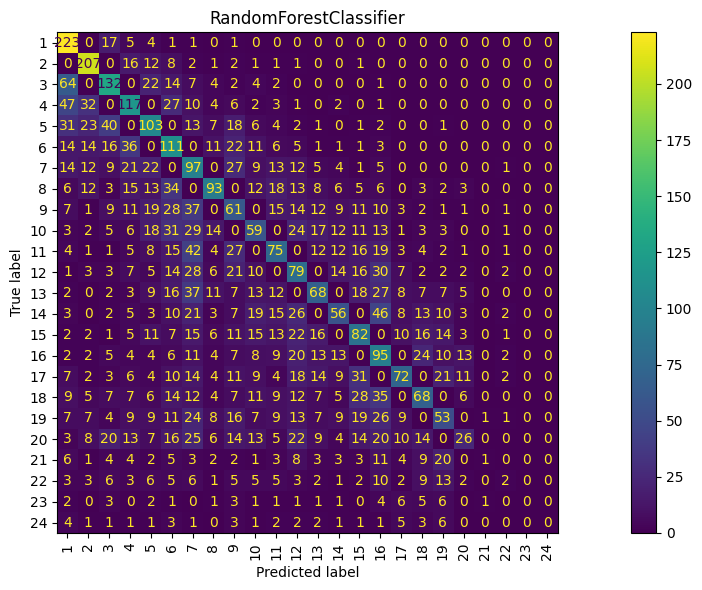

In [8]:
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)


model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3596800169527442
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.3582785666227535
              precision    recall  f1-score   support

           1       0.54      0.87      0.67       252
           2       0.64      0.76      0.69       252
           3       0.55      0.50      0.52       252
           4       0.44      0.44      0.44       252
           5       0.37      0.52      0.43       252
           6       0.30      0.56      0.39       252
           7       0.31      0.38      0.34       252
           8       0.28      0.26      0.27       252
           9       0.32      0.27      0.29       252
          10       0.21      0.31      0.25       252
          11       0.26      0.34      0.29       252
          12       0.37      0.37      0.37       252
          13       0.23      0.29      0.26       252


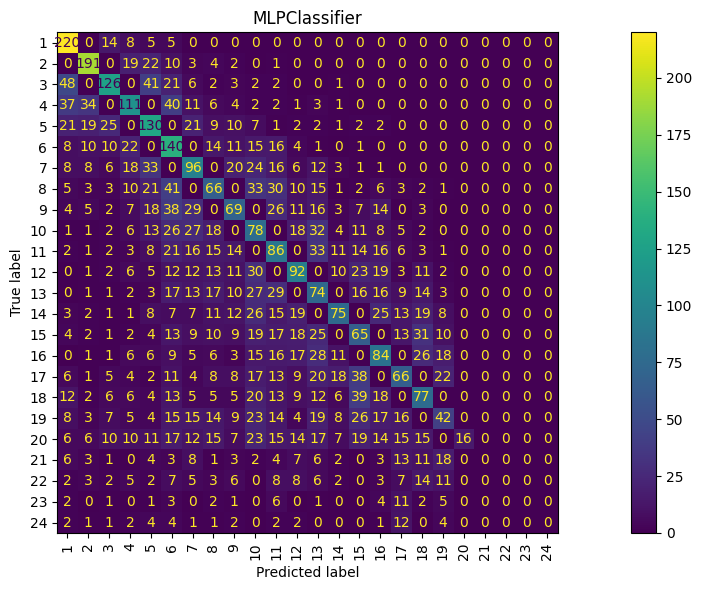

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNumber",
        "constructorRef",
        "raceRound",
        "circuitCountry",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "driverAgeToday",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3491017105789833
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.3924784749756727
              precision    recall  f1-score   support

           1       0.56      0.83      0.67       252
           2       0.63      0.70      0.66       252
           3       0.51      0.48      0.49       252
           4       0.43      0.43      0.43       252
           5       0.32      0.48      0.38       252
           6       0.27      0.54      0.36       252
           7       0.31      0.36      0.33       252
           8       0.26      0.22      0.24       252
           9       0.32      0.26      0.29       252
          10       0.20      0.25      0.22       252
          11       0.28      0.37      0.31       252
          12       0.33      0.38      0.35       252
          13       0.22      0.31      0.26       252


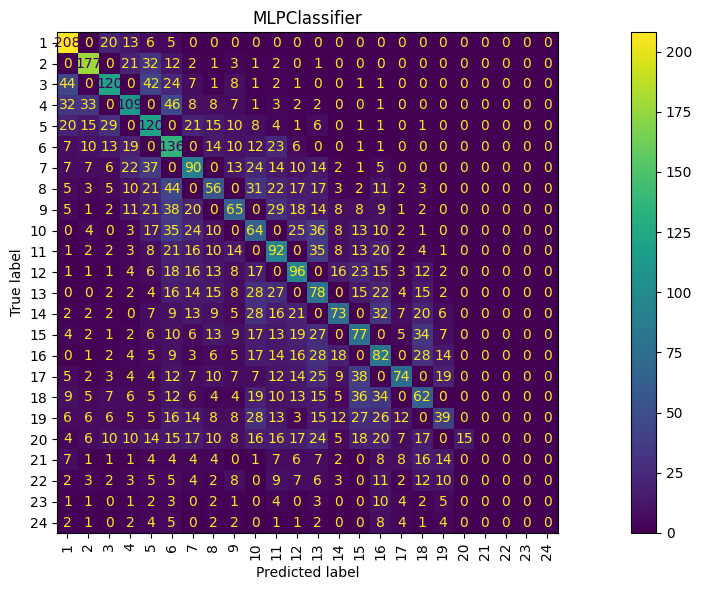

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, in this case, performance has not been improved.
